In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

#Es necesario habilitar el iterative imputer explicitamente ya que aun es experimental
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

df = pd.read_csv("/workspaces/repos1/Semana_10/Churn_Modelling.csv")

df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,NaN,NaN,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,NaN,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,NaN,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50.0,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Male,29.0,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44.0,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,NaN,2,134603.88,1,1,1,71725.73,0


<Axes: >

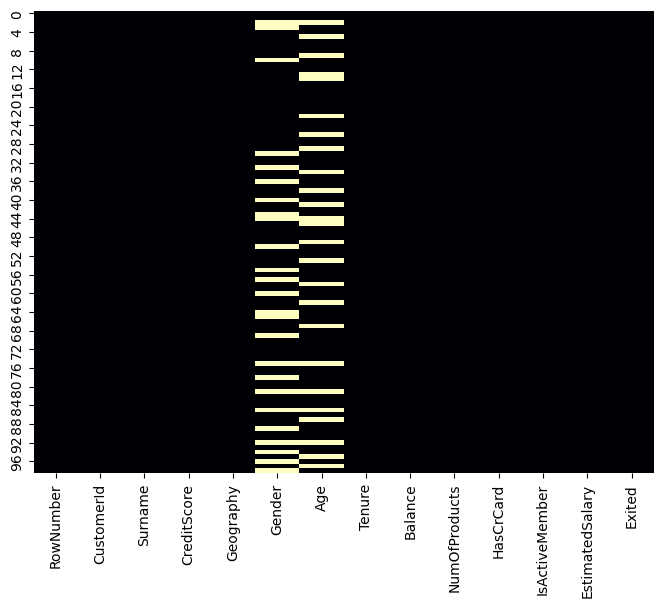

In [4]:
plt.figure(figsize = (8,6))
sb.heatmap(df.isnull(), cbar=False , cmap = 'magma')

In [5]:
df.isnull().sum()

RowNumber           0
CustomerId          0
Surname             0
CreditScore         0
Geography           0
Gender             25
Age                25
Tenure              0
Balance             0
NumOfProducts       0
HasCrCard           0
IsActiveMember      0
EstimatedSalary     0
Exited              0
dtype: int64

In [6]:
#Definiendo el imputer
imputer = IterativeImputer(random_state=100)

In [10]:
rf = RandomForestRegressor(random_state=100)
imputer = IterativeImputer(random_state=100, estimator=rf)

In [11]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,NaN,NaN,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,NaN,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


In [17]:
#Usar caracteristicas numéricas
df_train = df.loc[:, ["Balance", "Age", "Exited"]]
df_train.head(15)


,Balance,Age,Exited
0,0.00,42.000000,1
1,83807.86,41.000000,0
2,159660.80,32.130000,1
3,0.00,39.000000,0
4,125510.82,43.000000,0
5,113755.78,30.240000,1
6,0.00,50.000000,0
7,115046.74,29.000000,1
8,142051.07,44.000000,0
9,134603.88,43.060000,0


In [13]:
imputer.fit(df_train)

IterativeImputer(estimator=RandomForestRegressor(random_state=100),
                 random_state=100)

In [14]:
df_imputed = imputer.transform(df_train)
df_imputed[:10] 

array([[0.0000000e+00, 4.2000000e+01, 1.0000000e+00],
       [8.3807860e+04, 4.1000000e+01, 0.0000000e+00],
       [1.5966080e+05, 3.2130000e+01, 1.0000000e+00],
       [0.0000000e+00, 3.9000000e+01, 0.0000000e+00],
       [1.2551082e+05, 4.3000000e+01, 0.0000000e+00],
       [1.1375578e+05, 3.0240000e+01, 1.0000000e+00],
       [0.0000000e+00, 5.0000000e+01, 0.0000000e+00],
       [1.1504674e+05, 2.9000000e+01, 1.0000000e+00],
       [1.4205107e+05, 4.4000000e+01, 0.0000000e+00],
       [1.3460388e+05, 4.3060000e+01, 0.0000000e+00]])

In [18]:
df.loc[:, ["Balance", "Age", "Exited"]] = df_imputed
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.00,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.00,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,NaN,32.13,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,NaN,39.00,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.00,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,30.24,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50.00,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Male,29.00,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44.00,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,43.06,2,134603.88,1,1,1,71725.73,0


<Axes: >

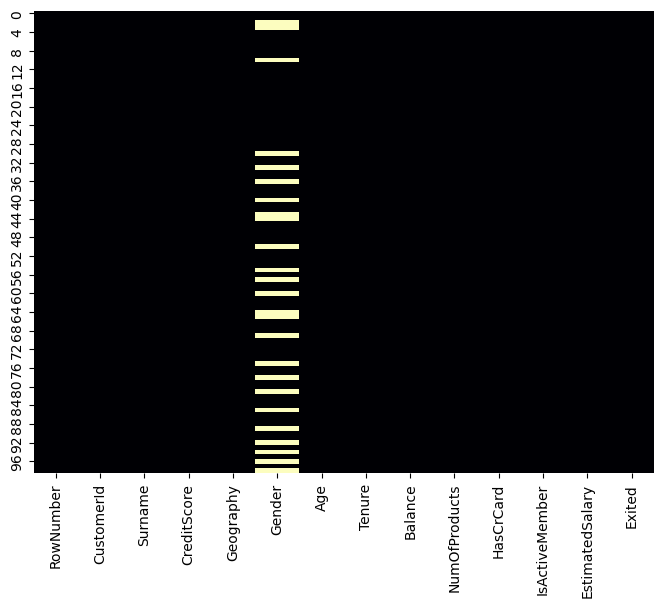

In [19]:
plt.figure(figsize = (8,6))
sb.heatmap(df.isnull(), cbar=False , cmap = 'magma')